# Customer Segmentation using K-means Clustering

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics.Customer Segmentation can be a powerful means to identify unsatisfied customer needs.

## Advantages of Customer Segmentation
1. Determine appropriate product pricing.
2. Develop customized marketing campaigns.
3. Design an optimal distribution strategy.
4. Choose specific product features for deployment
5. Prioritize new product development efforts.

## Task
You are owing a supermarket mall and through membership cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. You want to understand the customers like who are the target customers so that the sense can be given to marketing team and plan the strategy accordingly.

### Data: MallCustomers

### Import Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

### Analysing Data

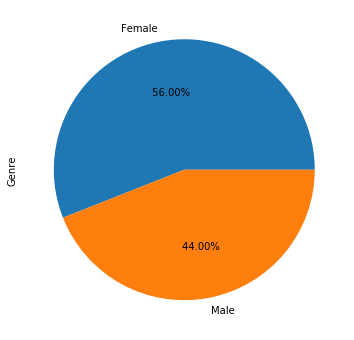

In [4]:
#pie diagram
plt.figure(figsize=(6,6))
df['Genre'].value_counts().plot.pie(autopct='% 0.2f%%')

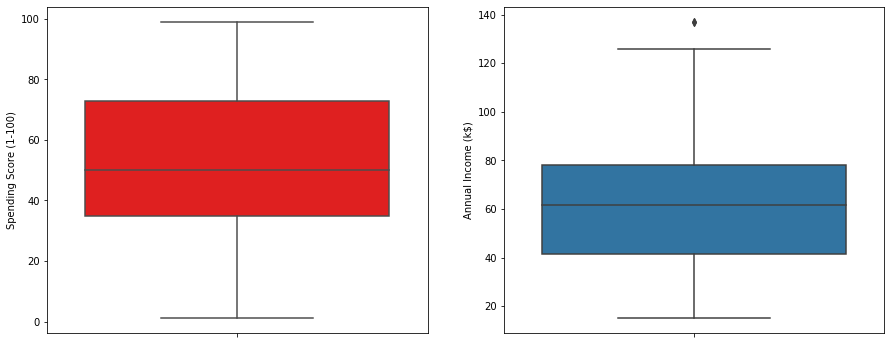

In [5]:
# Boxplot
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

Box plot of annual income and spending score to better visualize the distribution range. The range of spending score is clearly more than the annual income range.

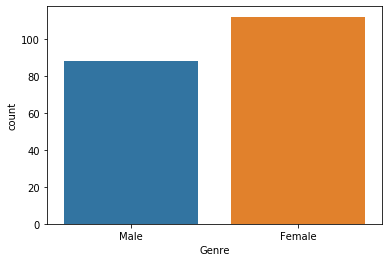

In [6]:
# Count plot
sns.countplot(df['Genre'])

Bar plot to check the distribution of male and female population in the dataset. The female population clearly outweighs the male counterpart.

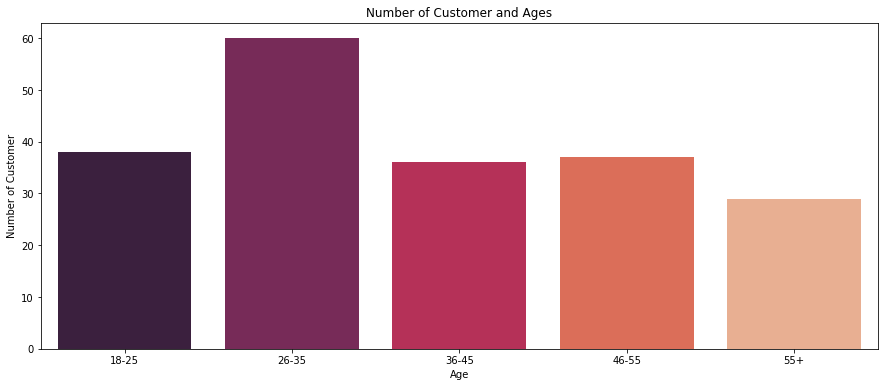

In [7]:
# Bar plot
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Bar plot to check the distribution of number of customers in each age group. Clearly the 26–35 age group outweighs every other age group.

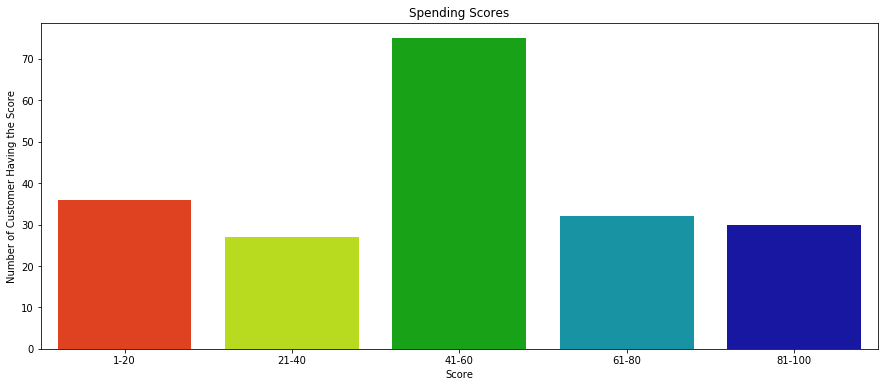

In [8]:
# Bar plot
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

Bar plot to visualize the number of customers according to their spending scores. The majority of the customers have spending score in the range 41–60.

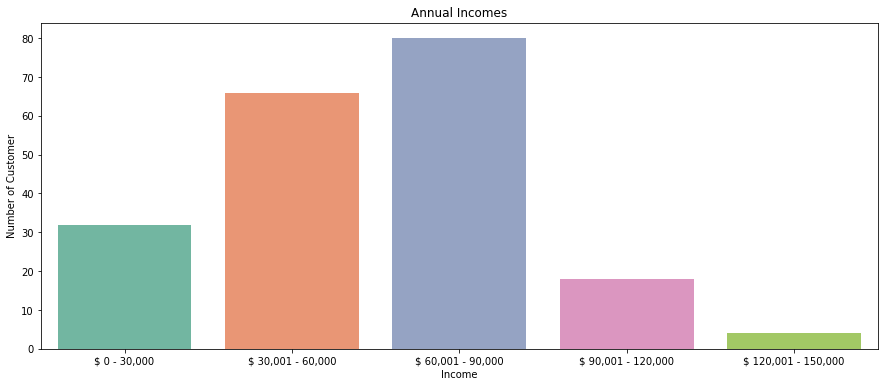

In [9]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

Bar plot to visualize the number of customers according to their annual income. The majority of the customers have annual income in the range 60000 and 90000.

### Elbow Method
The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.

In [10]:
# import KMeans library
from sklearn.cluster import KMeans

In [ ]:
sse = [] #sum of squared error
k_range = range(1,10)  #k-no.of clusters
for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(model.inertia_)

In [ ]:
plt.plot(k_range,sse)

The optimal K value is found to be 5 using the elbow method.

### Training K means

In [ ]:
model = KMeans(n_clusters = 5)
y_pred = model.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])

In [ ]:
df['clusters'] = y_pred
df.head()

### Visualizing clusters

In [ ]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
df4 = df[df.clusters==3]
df5 = df[df.clusters==4]

In [ ]:
plt.figure(figsize = (10,7))
sns.scatterplot(df1['Annual Income (k$)'],df1['Spending Score (1-100)'], color = 'black')
sns.scatterplot(df2['Annual Income (k$)'],df2['Spending Score (1-100)'], color = 'red')
sns.scatterplot(df3['Annual Income (k$)'],df3['Spending Score (1-100)'], color = 'orange')
sns.scatterplot(df4['Annual Income (k$)'],df4['Spending Score (1-100)'], color = 'brown')
sns.scatterplot(df5['Annual Income (k$)'],df5['Spending Score (1-100)'], color = 'blue')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'green', label = 'Centroids')
plt.legend()

### Conclusion
K means clustering is one of the most popular clustering algorithms and usually the first thing practitioners apply when solving clustering tasks to get an idea of the structure of the dataset. The goal of K means is to group data points into distinct non-overlapping subgroups. One of the major application of K means clustering is segmentation of customers to get a better understanding of them which in turn could be used to increase the revenue of the company